# **Classic Mean Risk Optimization**

In [1]:
# !pip install pybind11
# !pip install path/cvxpy‑version.whl
# !pip install riskfolio-lib
# !pip install PyPortfolioOpt

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import requests
import datetime
import plotly.express as px
import pandas_datareader
import pandas_datareader.data as web
import riskfolio as rp
import matplotlib.pyplot as plt
from datetime import date

Step1: Load ETFs with highest YTD return from etfdb.com
Step2: Calculate Sharpe Ratio 

Sharpe Ratio Formula = (Return - Risk Free Return)/ Standard Deviation

Here we're taking Risk Free Return = 0

Step3: Scatter Plot of YTD return vs Sharpe Ratio

In [3]:
#Load ETFs with highest YTD return from etfdb.com
url = 'https://etfdb.com/compare/highest-ytd-returns/no-leveraged/'
html = requests.get(url).content
#get all tables in a list
df_list = pd.read_html(html)
#get first table
etf_list = df_list[0]
etf_list['Sharpe Ratio']=''
etf_list.head()

,Symbol,Name,YTD Return,AUM,Avg Daily Share Volume (3mo),Sharpe Ratio
0,WGMI,Valkyrie Bitcoin Miners ETF,104.92%,"$5,486.00",51549,
1,DAM,VanEck Digital Assets Mining ETF,83.56%,"$1,305.75",2774,
2,DEFI,Hashdex Bitcoin Futures ETF,72.06%,"$1,725.78",348,
3,BITO,ProShares Bitcoin Strategy ETF,71.44%,"$911,764.00",10509800,
4,XBTF,VanEck Bitcoin Strategy ETF,70.66%,"$37,596.60",16974,


In [4]:
start = datetime.datetime(2020, 1, 1)
end = date.today()

for sym in etf_list['Symbol']:
  data = yf.download(sym, start = start, end = end)
  data['Daily Return'] = data['Adj Close'].pct_change(1)
  sharpe_ratio = data['Daily Return'].mean() / data['Daily Return'].std()
  annual_sharpe_ratio = (252**0.5) * sharpe_ratio
  #sharpe_ratio
  etf_list.loc[etf_list['Symbol'] == sym, 'Sharpe Ratio'] = annual_sharpe_ratio

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
#Step3: Scatter Plot of YTD return vs Sharpe Ratio
fig = px.scatter(etf_list,x='Sharpe Ratio',y='YTD Return',color='Symbol',hover_data=['Name'],title="Sharpe Ratio VS YTD Return")
fig.show()

In [6]:
etf_list.sort_values(by=['Sharpe Ratio'],ascending=False)

,Symbol,Name,YTD Return,AUM,Avg Daily Share Volume (3mo),Sharpe Ratio
64,QGRW,WisdomTree U.S. Quality Growth Fund,17.40%,"$2,719.90",2489,2.944495
84,PJFG,PGIM Jennison Focused Growth ETF,16.54%,"$45,764.90",0,1.518391
5,MAXI,Simplify Bitcoin Strategy PLUS Income ETF,70.03%,"$22,160.30",16197,1.506637
2,DEFI,Hashdex Bitcoin Futures ETF,72.06%,"$1,725.78",348,1.488533
20,PP,Meet Kevin Pricing Power ETF,28.90%,"$22,949.70",38587,1.284024
...,...,...,...,...,...,...
8,DAPP,VanEck Digital Transformation ETF,67.04%,"$28,359.90",108274,-0.920778
11,SATO,Invesco Alerian Galaxy Crypto Economy ETF,61.81%,"$2,709.01",3474,-0.974654
42,MEME,Roundhill MEME ETF,20.18%,$918.06,4744,-0.988226
7,BITS,Global X Blockchain & Bitcoin Strategy ETF,67.40%,"$10,448.10",2761,-1.049094


In [7]:
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = str(start).split()[0]
end = str(end).split()[0]

# Tickers of assets
assets = list(etf_list.sort_values(by=['Sharpe Ratio'],ascending=False)['Symbol'][0:100])
assets.sort()

# Downloading data
dataframe = yf.download(assets, start = start, end = end)
dataframe = dataframe.loc[:,('Adj Close', slice(None))]
dataframe.columns = assets

[*********************100%***********************]  100 of 100 completed


In [8]:
returns = dataframe[assets].pct_change().dropna()
returns.head()

,AIQ,AOTG,ARKF,ARKK,ARKQ,ARKW,ARVR,BITO,BITQ,BITS,...,VGT,VR,WCBR,WGMI,WUGI,XBTF,XLC,XLK,XNTK,XSD
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-23,-0.7921%,0.0231%,-0.3561%,-1.9937%,-0.0248%,-0.6837%,-0.1857%,0.3824%,-0.5814%,0.6979%,...,0.0376%,-0.5501%,-0.7419%,-0.7634%,-0.0440%,0.3567%,0.9717%,0.1044%,-0.1241%,-0.3450%
2022-12-27,-0.6487%,-2.1669%,-2.1444%,-3.8424%,-2.1292%,-3.4419%,-0.7856%,-1.2381%,-4.3860%,-2.9261%,...,-0.9775%,-0.1659%,-2.5692%,-4.2986%,-1.7180%,-1.0426%,-0.8996%,-0.9470%,-0.8700%,-2.0951%
2022-12-28,-1.6575%,-0.8435%,-0.7305%,-0.4701%,-0.1265%,-0.0274%,-1.1961%,-0.1929%,-1.8349%,-1.1370%,...,-1.5724%,-1.7174%,-0.0753%,-3.3097%,-1.2942%,-0.2634%,-1.4566%,-1.6124%,-1.5254%,-1.5791%
2022-12-29,3.0527%,0.9458%,5.0773%,5.1619%,3.7234%,5.1289%,3.4208%,0.0000%,3.7383%,2.1752%,...,2.7258%,4.7064%,4.4280%,5.2567%,3.7134%,0.2521%,2.7635%,2.6188%,3.0557%,3.3761%
2022-12-30,-0.0994%,2.9190%,-0.0700%,0.2246%,0.1465%,0.5740%,-0.6485%,0.7729%,1.8018%,0.5151%,...,-0.0532%,-0.6483%,-0.0656%,3.8328%,-0.7773%,0.7903%,0.0417%,-0.1364%,-0.2677%,0.2097%


# **Estimating Mean Variance Portfolios**

# **Calculating the portfolio that maximizes Sharpe ratio**

In [9]:
# Building the portfolio object
port = rp.Portfolio(returns=returns)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

You must convert self.cov to a positive definite matrix


,AIQ,AOTG,ARKF,ARKK,ARKQ,ARKW,ARVR,BITO,BITQ,BITS,...,VGT,VR,WCBR,WGMI,WUGI,XBTF,XLC,XLK,XNTK,XSD
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


# **Plotting portfolio composition**

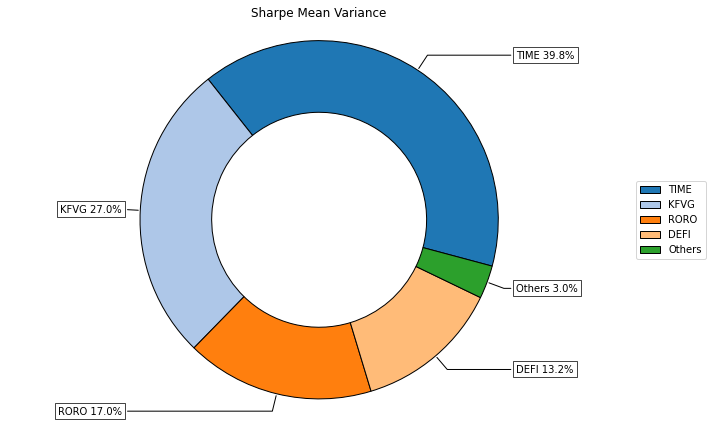

In [10]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [11]:
import pandas as pd
from pypfopt import EfficientFrontier, risk_models, expected_returns, objective_functions
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(dataframe)
S = risk_models.sample_cov(dataframe)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=1)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
# ef.save_weights_to_file("weights.csv")  # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

latest_prices = get_latest_prices(dataframe)

da = DiscreteAllocation(dict(zip(w.index,w['weights'])), latest_prices, total_portfolio_value=10000)
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

OrderedDict([('AIQ', 0.0), ('AOTG', 0.0), ('ARKF', 0.0), ('ARKK', 0.0), ('ARKQ', 0.0), ('ARKW', 0.0), ('ARVR', 0.0), ('BITO', 0.0), ('BITQ', 0.0), ('BITS', 0.0), ('BKCH', 0.0), ('BLOK', 0.0), ('BNGE', 0.0), ('BOTZ', 0.0), ('BTF', 0.0), ('BUZZ', 0.0), ('BWEB', 0.0), ('BYOB', 0.0), ('CARZ', 0.0), ('CHIC', 0.0), ('CRPT', 0.0), ('CRYP', 0.0), ('DAM', 0.0), ('DAPP', 0.0), ('DEFI', 0.20881), ('EIRL', 0.0), ('ENTR', 0.0), ('ESPO', 0.0), ('FBCG', 0.0), ('FDIG', 0.0), ('FDN', 0.0), ('FDRV', 0.0), ('FNGS', 0.0), ('FTEC', 0.0), ('FTXL', 0.0), ('GFOF', 0.0), ('IBLC', 0.0), ('IGM', 0.0), ('IQM', 0.0), ('IRBO', 0.0), ('IXN', 0.0), ('IXP', 0.0), ('IYW', 0.0), ('KFVG', 0.0), ('LOUP', 0.0), ('LRNZ', 0.0), ('MAXI', 0.22942), ('MEME', 0.0), ('METV', 0.0), ('MGK', 0.0), ('MOTO', 0.0), ('MSTQ', 0.0), ('MVPS', 0.0), ('ODDS', 0.0), ('PJFG', 0.07896), ('PNQI', 0.0), ('PP', 0.09928), ('PSI', 0.0), ('QGRW', 0.29838), ('QPX', 0.0), ('QQC', 0.0), ('QQD', 0.0), ('QQMG', 0.0), ('QQQ', 0.0), ('QQQM', 0.0), ('QTAP', 

# **Calculate efficient frontier**

In [12]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AIQ,AOTG,ARKF,ARKK,ARKQ,ARKW,ARVR,BITO,BITQ,BITS,...,VGT,VR,WCBR,WGMI,WUGI,XBTF,XLC,XLK,XNTK,XSD
0,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
1,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
2,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
3,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
4,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


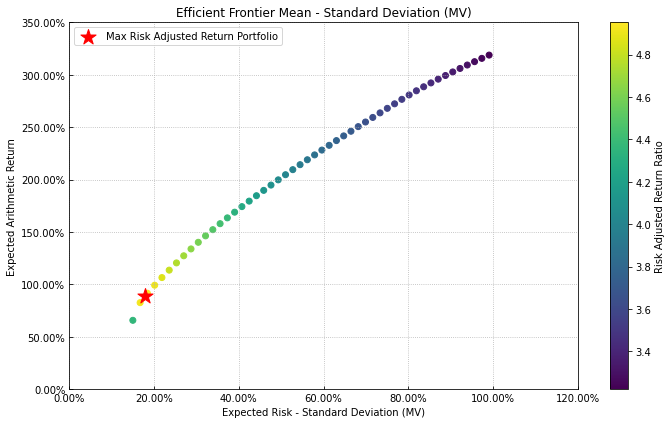

In [13]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

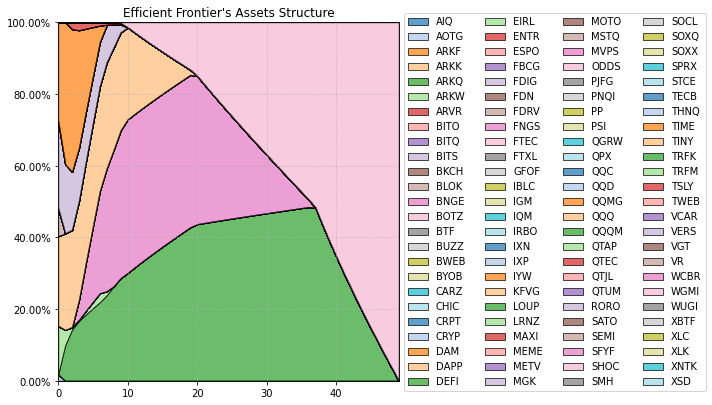

In [14]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

# **Estimating Mean Risk Portfolios**

**In this part I will calculate optimal portfolios for several risk measures. First I'm going to calculate the portfolio that maximizes risk adjusted return when CVaR is the risk measure, then I'm going to calculate the portfolios that maximize the risk adjusted return for all available risk measures.**

# **Calculating the portfolio that maximizes Return/CVaR ratio.**

In [15]:
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AIQ,AOTG,ARKF,ARKK,ARKQ,ARKW,ARVR,BITO,BITQ,BITS,...,VGT,VR,WCBR,WGMI,WUGI,XBTF,XLC,XLK,XNTK,XSD
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


# **Plotting portfolio composition**

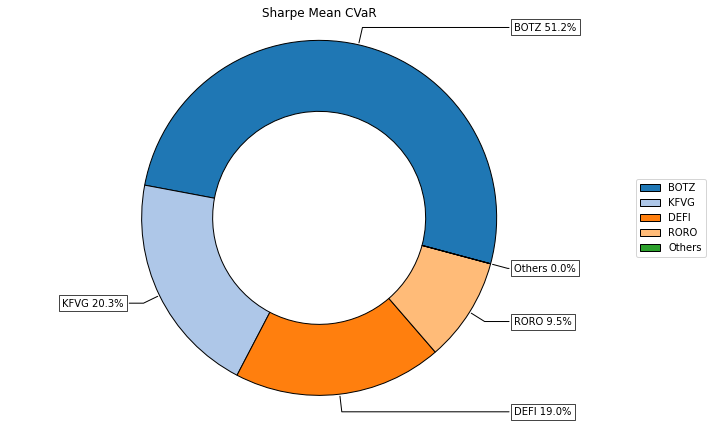

In [16]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [17]:
da = DiscreteAllocation(dict(zip(w.index,w['weights'])), latest_prices, total_portfolio_value=10000)
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'BOTZ': 210, 'KFVG': 113, 'DEFI': 53, 'RORO': 58}
Funds remaining: $12.70


# **Calculate efficient frontier**

In [18]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AIQ,AOTG,ARKF,ARKK,ARKQ,ARKW,ARVR,BITO,BITQ,BITS,...,VGT,VR,WCBR,WGMI,WUGI,XBTF,XLC,XLK,XNTK,XSD
0,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
1,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
2,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
3,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
4,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


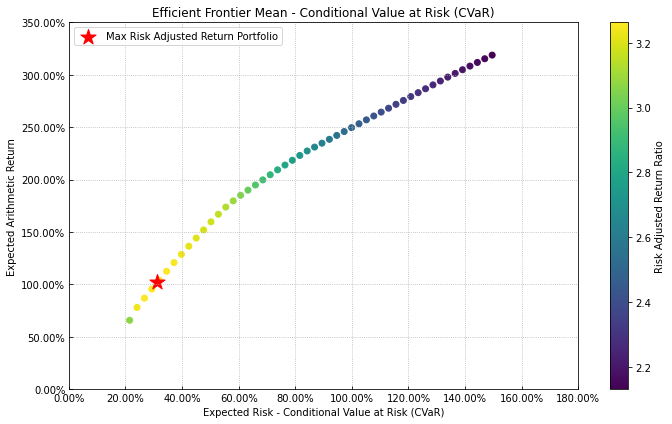

In [19]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

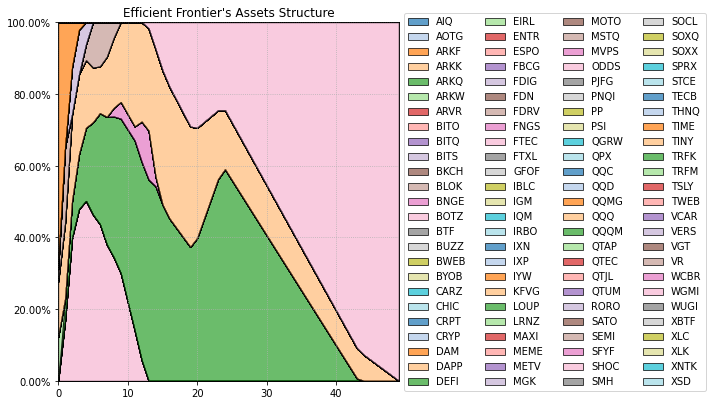

In [20]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

# **Calculate Optimal Portfolios for Several Risk Measures**

In [21]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [22]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
AIQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
AOTG,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ARKF,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ARKK,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ARKQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ARKW,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ARVR,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BITO,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BITQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BITS,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

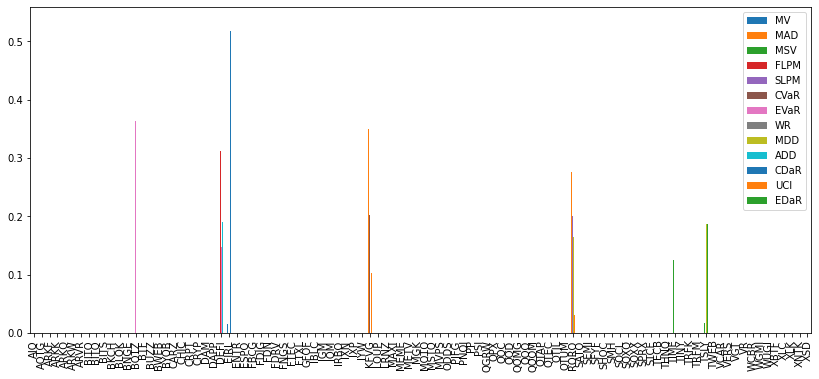

In [23]:
# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)